In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mplsoccer.pitch import Pitch

In [7]:
from statsbombpy import sb
sb.matches(competition_id=37, season_id=4)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,7298,2018-02-24,20:45:00.000,England - FA Women's Super League,2018/2019,Manchester City WFC,Chelsea FCW,2,2,available,...,2021-06-13T16:17:31.694,0,Regular Season,Academy Stadium,Darren England,Nick Cushing,Emma Hayes,1.0.2,None,None
1,19778,2018-12-09,13:15:00.000,England - FA Women's Super League,2018/2019,Manchester City WFC,Birmingham City WFC,1,0,available,...,2021-06-13T16:17:31.694,12,Regular Season,Academy Stadium,Rebecca Welch,Nick Cushing,Marc Skinner,1.0.3,None,None
2,19771,2018-12-02,15:00:00.000,England - FA Women's Super League,2018/2019,Birmingham City WFC,Yeovil Town LFC,2,1,available,...,2021-06-13T16:17:31.694,11,Regular Season,\tARMCO Arena,Jane Simms,Marc Skinner,Lee Burch,1.0.3,None,None
3,19736,2018-10-14,15:00:00.000,England - FA Women's Super League,2018/2019,Chelsea FCW,Arsenal WFC,0,5,available,...,2021-06-13T16:17:31.694,5,Regular Season,Kingsmeadow,Sam Purkiss,Emma Hayes,Joseph Montemurro,1.0.3,None,None
4,19745,2018-10-28,15:00:00.000,England - FA Women's Super League,2018/2019,Brighton & Hove Albion WFC,Yeovil Town LFC,2,1,available,...,2021-06-13T16:17:31.694,7,Regular Season,Broadfield Stadium,Jacob Miles,Hope Patricia Powell,Lee Burch,1.0.3,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,19754,2019-03-24,13:30:00.000,England - FA Women's Super League,2018/2019,Liverpool WFC,Arsenal WFC,1,5,available,...,2021-06-13T16:17:31.694,16,Regular Season,Prenton Park,Helen Conley,Victoria Jepson,Joseph Montemurro,1.1.0,None,None
104,19724,2018-09-23,15:00:00.000,England - FA Women's Super League,2018/2019,Arsenal WFC,West Ham United LFC,4,3,available,...,2021-06-13T16:17:31.694,3,Regular Season,Meadow Park,Paul Howard,Joseph Montemurro,Matt Beard,1.0.3,None,None
105,19814,2019-04-28,16:00:00.000,England - FA Women's Super League,2018/2019,Bristol City WFC,West Ham United LFC,1,2,available,...,2021-06-13T16:17:31.694,21,Regular Season,Stoke Gifford Stadium,Richard Hulme,Tanya Oxtoby,Matt Beard,1.1.0,2,None
106,19729,2019-03-24,16:00:00.000,England - FA Women's Super League,2018/2019,Bristol City WFC,Everton LFC,1,0,available,...,2021-06-13T16:17:31.694,4,Regular Season,Stoke Gifford Stadium,Stacey Pearson,Tanya Oxtoby,Willie Kirk,1.1.0,None,None


In [8]:
import os
import pandas as pd
from statsbombpy import sb

# Get all matches for a competition and season
matches_data = sb.matches(competition_id=37, season_id=4)
matches_df = pd.DataFrame(matches_data)

# Extract relevant columns from the matches dataframe
games = matches_df.match_id.tolist()
home_team = matches_df.home_team.tolist()
away_team = matches_df.away_team.tolist()

# Create a table using the extracted data
table = pd.DataFrame({'Match ID': games, 'Home Team': home_team, 'Away Team': away_team})

# Define columns to keep
columns_to_keep = ['timestamp', 'team', 'player', 'type', 'position', 'location', 'pass_end_location']

# Export separate CSV files for each match with selected columns
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
for i, row in table.iterrows():
    match_id = row['Match ID']
    home_team = row['Home Team']
    away_team = row['Away Team']
    file_name = f'{match_id}_{home_team}_vs_{away_team}.csv'
    file_path = os.path.join(desktop_path, file_name)
    
    # Get match data and select relevant columns
    match_data = sb.events(match_id=match_id)
    match_df = pd.DataFrame(match_data)
    match_df = match_df[columns_to_keep]
    
    # Export match data to the CSV file
    match_df.to_csv(file_path, index=False)
    print(f'{file_name} exported successfully')


7298_Manchester City WFC_vs_Chelsea FCW.csv exported successfully
19778_Manchester City WFC_vs_Birmingham City WFC.csv exported successfully


KeyboardInterrupt: 

In [ ]:
import os
import pandas as pd

# Define the path to the directory containing the CSV files
dir_path = os.path.join(os.path.expanduser("~"), "Desktop")

# Define a list to hold the dataframes for each CSV file
dfs = []

# Loop through each CSV file in the directory
for filename in os.listdir(dir_path):
    if filename.endswith(".csv"):
        # Read the CSV file into a dataframe
        file_path = os.path.join(dir_path, filename)
        df = pd.read_csv(file_path)
        
        # Add a new column to the dataframe to store the match name
        match_name = filename[:-4]  # remove the ".csv" extension from the filename
        df['Match Name'] = match_name
        
        # Add the dataframe to the list
        dfs.append(df)

# Concatenate all dataframes in the list into a single dataframe
merged_df = pd.concat(dfs)

# Drop any duplicate rows based on the 'timestamp' and 'player' columns
merged_df.drop_duplicates(subset=['timestamp', 'player'], inplace=True)

# Export the merged dataframe to a CSV file
export_path = os.path.join(dir_path, "merged_data.csv")
merged_df.to_csv(export_path, index=False)

print("Merged data exported successfully")

In [ ]:
df = pd.read_csv("merged_data.csv")

In [ ]:
print(df)

In [57]:
import pandas as pd
df = pd.read_csv('final.csv')
df

df = df.dropna()

print(df)


      timestamp                        team                    player  type  \
1      00:00:06  Brighton & Hove Albion WFC  Iniabasi Anefiok Umotong  Pass   
2      00:00:09  Brighton & Hove Albion WFC         Victoria Williams  Pass   
3      00:00:13  Brighton & Hove Albion WFC             Kirsty Barton  Pass   
4      00:00:14  Brighton & Hove Albion WFC  Iniabasi Anefiok Umotong  Pass   
5      00:00:23                 Chelsea FCW  Magdalena Lilly Eriksson  Pass   
...         ...                         ...                       ...   ...   
16636  00:49:40                 Reading WFC              Rebecca Jane  Pass   
16637  00:49:51                 Reading WFC              Rebecca Jane  Pass   
16638  00:49:53                 Reading WFC            Rachel Furness  Pass   
16639  00:50:00                 Reading WFC            Mayumi Pacheco  Pass   
16640  00:50:03                 Reading WFC                Remi Allen  Pass   

                        position      x     y     x

In [58]:
df = df.loc[(df['type'] == 'Pass')]
df

,timestamp,team,player,type,position,x,y,xx,yy,Match Name
1,00:00:06,Brighton & Hove Albion WFC,Iniabasi Anefiok Umotong,Pass,Center Forward,61.0,41.0,40.0,30.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
2,00:00:09,Brighton & Hove Albion WFC,Victoria Williams,Pass,Left Center Back,40.0,38.0,54.0,78.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
3,00:00:13,Brighton & Hove Albion WFC,Kirsty Barton,Pass,Right Back,62.0,79.0,72.0,73.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
4,00:00:14,Brighton & Hove Albion WFC,Iniabasi Anefiok Umotong,Pass,Center Forward,72.0,73.0,76.0,80.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
5,00:00:23,Chelsea FCW,Magdalena Lilly Eriksson,Pass,Left Center Back,39.0,1.0,30.0,15.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
...,...,...,...,...,...,...,...,...,...,...
16636,00:49:40,Reading WFC,Rebecca Jane,Pass,Right Back,84.0,76.0,86.0,74.0,19820_Reading WFC_vs_Chelsea FCW
16637,00:49:51,Reading WFC,Rebecca Jane,Pass,Right Back,100.0,80.0,102.0,68.0,19820_Reading WFC_vs_Chelsea FCW
16638,00:49:53,Reading WFC,Rachel Furness,Pass,Center Defensive Midfield,102.0,68.0,105.0,42.0,19820_Reading WFC_vs_Chelsea FCW
16639,00:50:00,Reading WFC,Mayumi Pacheco,Pass,Left Back,78.0,9.0,89.0,5.0,19820_Reading WFC_vs_Chelsea FCW


In [59]:
import pandas as pd


# filter rows based on the condition
df = df[(df['xx'] > 102)]
df = df[(df['yy'] > 18) | (df['yy'] < 62)]
df



,timestamp,team,player,type,position,x,y,xx,yy,Match Name
25,00:02:36,Brighton & Hove Albion WFC,Danielle Buet,Pass,Right Center Midfield,68.0,30.0,106.0,55.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
30,00:03:11,Chelsea FCW,Magdalena Lilly Eriksson,Pass,Left Center Back,53.0,7.0,108.0,10.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
31,00:03:18,Chelsea FCW,Francesca Kirby,Pass,Center Forward,114.0,13.0,106.0,24.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
45,00:04:12,Chelsea FCW,Millie Bright,Pass,Right Center Back,57.0,77.0,104.0,43.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
56,00:05:13,Chelsea FCW,So-Yun Ji,Pass,Left Defensive Midfield,71.0,33.0,107.0,27.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
...,...,...,...,...,...,...,...,...,...,...
16598,00:45:47,Reading WFC,Lauren Bruton,Pass,Left Wing,111.0,13.0,110.0,30.0,19820_Reading WFC_vs_Chelsea FCW
16613,00:47:41,Chelsea FCW,Maren Nævdal Mjelde,Pass,Right Back,89.0,80.0,108.0,75.0,19820_Reading WFC_vs_Chelsea FCW
16632,00:48:58,Reading WFC,Jade Moore,Pass,Right Center Midfield,36.0,24.0,105.0,25.0,19820_Reading WFC_vs_Chelsea FCW
16638,00:49:53,Reading WFC,Rachel Furness,Pass,Center Defensive Midfield,102.0,68.0,105.0,42.0,19820_Reading WFC_vs_Chelsea FCW


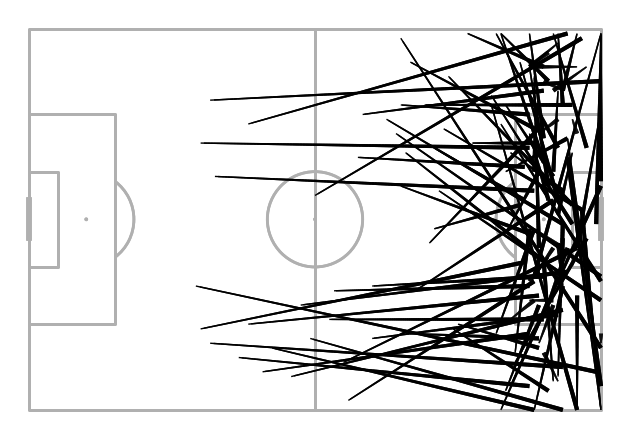

In [60]:
mc = df.loc[(df['team'] == 'Reading WFC')]
import matplotlib.pyplot as plt

from mplsoccer.pitch import Pitch

pitch = Pitch(pitch_type='statsbomb')  # example plotting an Opta/ Stats Perform pitch
fig, ax = pitch.draw()

pitch.draw(ax=ax)


pitch.lines(xstart = mc['x'], ystart = mc['y'], xend = mc['xx'],yend = mc['yy'],
                   color = 'black', lw = 3, zorder =2, comet = True , ax=ax)
        

In [61]:
df

,timestamp,team,player,type,position,x,y,xx,yy,Match Name
25,00:02:36,Brighton & Hove Albion WFC,Danielle Buet,Pass,Right Center Midfield,68.0,30.0,106.0,55.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
30,00:03:11,Chelsea FCW,Magdalena Lilly Eriksson,Pass,Left Center Back,53.0,7.0,108.0,10.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
31,00:03:18,Chelsea FCW,Francesca Kirby,Pass,Center Forward,114.0,13.0,106.0,24.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
45,00:04:12,Chelsea FCW,Millie Bright,Pass,Right Center Back,57.0,77.0,104.0,43.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
56,00:05:13,Chelsea FCW,So-Yun Ji,Pass,Left Defensive Midfield,71.0,33.0,107.0,27.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
...,...,...,...,...,...,...,...,...,...,...
16598,00:45:47,Reading WFC,Lauren Bruton,Pass,Left Wing,111.0,13.0,110.0,30.0,19820_Reading WFC_vs_Chelsea FCW
16613,00:47:41,Chelsea FCW,Maren Nævdal Mjelde,Pass,Right Back,89.0,80.0,108.0,75.0,19820_Reading WFC_vs_Chelsea FCW
16632,00:48:58,Reading WFC,Jade Moore,Pass,Right Center Midfield,36.0,24.0,105.0,25.0,19820_Reading WFC_vs_Chelsea FCW
16638,00:49:53,Reading WFC,Rachel Furness,Pass,Center Defensive Midfield,102.0,68.0,105.0,42.0,19820_Reading WFC_vs_Chelsea FCW


In [62]:
df

,timestamp,team,player,type,position,x,y,xx,yy,Match Name
25,00:02:36,Brighton & Hove Albion WFC,Danielle Buet,Pass,Right Center Midfield,68.0,30.0,106.0,55.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
30,00:03:11,Chelsea FCW,Magdalena Lilly Eriksson,Pass,Left Center Back,53.0,7.0,108.0,10.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
31,00:03:18,Chelsea FCW,Francesca Kirby,Pass,Center Forward,114.0,13.0,106.0,24.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
45,00:04:12,Chelsea FCW,Millie Bright,Pass,Right Center Back,57.0,77.0,104.0,43.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
56,00:05:13,Chelsea FCW,So-Yun Ji,Pass,Left Defensive Midfield,71.0,33.0,107.0,27.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC
...,...,...,...,...,...,...,...,...,...,...
16598,00:45:47,Reading WFC,Lauren Bruton,Pass,Left Wing,111.0,13.0,110.0,30.0,19820_Reading WFC_vs_Chelsea FCW
16613,00:47:41,Chelsea FCW,Maren Nævdal Mjelde,Pass,Right Back,89.0,80.0,108.0,75.0,19820_Reading WFC_vs_Chelsea FCW
16632,00:48:58,Reading WFC,Jade Moore,Pass,Right Center Midfield,36.0,24.0,105.0,25.0,19820_Reading WFC_vs_Chelsea FCW
16638,00:49:53,Reading WFC,Rachel Furness,Pass,Center Defensive Midfield,102.0,68.0,105.0,42.0,19820_Reading WFC_vs_Chelsea FCW


# Clustering 

In [63]:
df
all_rows = df.iloc[:]   
print(all_rows)

      timestamp                        team                    player  type  \
25     00:02:36  Brighton & Hove Albion WFC             Danielle Buet  Pass   
30     00:03:11                 Chelsea FCW  Magdalena Lilly Eriksson  Pass   
31     00:03:18                 Chelsea FCW           Francesca Kirby  Pass   
45     00:04:12                 Chelsea FCW             Millie Bright  Pass   
56     00:05:13                 Chelsea FCW                 So-Yun Ji  Pass   
...         ...                         ...                       ...   ...   
16598  00:45:47                 Reading WFC             Lauren Bruton  Pass   
16613  00:47:41                 Chelsea FCW       Maren Nævdal Mjelde  Pass   
16632  00:48:58                 Reading WFC                Jade Moore  Pass   
16638  00:49:53                 Reading WFC            Rachel Furness  Pass   
16640  00:50:03                 Reading WFC                Remi Allen  Pass   

                        position      x     y     x

C:\Users\SINGER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SINGER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SINGER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SINGER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

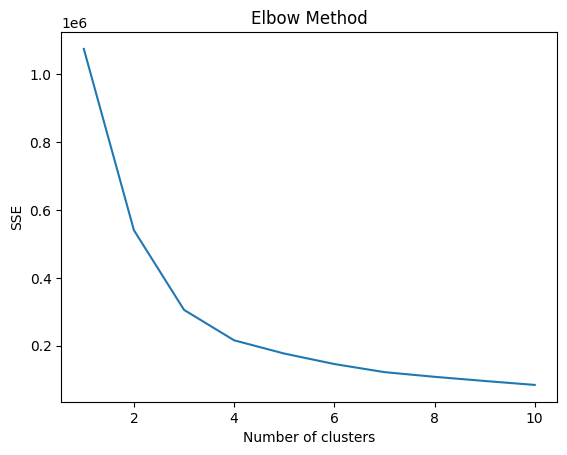

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


X = df[['x', 'y']]

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


In [85]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Load data


# Define model parameters
eps = 3 # based on elbow method or domain knowledge
min_samples = 5 # set as 2 or more

# Fit DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(df[["x", "y"]])

# Add cluster labels as a new column
df["cluster"] = dbscan.labels_

# Print the resulting clusters
print(df["cluster"].value_counts())


-1     234
 1     194
 0     126
 4      56
 2      37
 6      36
 3      32
 7      26
 8      19
 5      11
 12     10
 14      9
 10      9
 9       9
 15      7
 11      7
 13      6
 16      5
 17      5
Name: cluster, dtype: int64


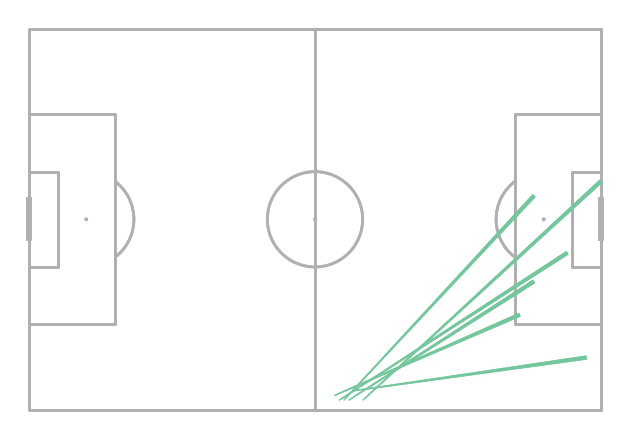

In [126]:
pitch = Pitch(pitch_type='statsbomb')  # example plotting an Opta/ Stats Perform pitch
fig, ax = pitch.draw()

pitch.draw(ax=ax)

df1 = df[df['cluster'] == 13]

pitch.lines(xstart = df1['x'], ystart = df1['y'], xend = df1['xx'],yend = df1['yy'],
                   color = '#74c69d', lw = 3, zorder =2, comet = True , ax=ax)
        

In [131]:
df = df[(df.cluster != -1) & (df.cluster != 3) & (df.cluster != 6)]
df

,timestamp,team,player,type,position,x,y,xx,yy,Match Name,cluster
31,00:03:18,Chelsea FCW,Francesca Kirby,Pass,Center Forward,114.0,13.0,106.0,24.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC,0
124,00:09:33,Brighton & Hove Albion WFC,Kayleigh Green,Pass,Left Center Midfield,93.0,78.0,106.0,54.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC,1
140,00:10:26,Chelsea FCW,Millie Bright,Pass,Right Center Back,85.0,74.0,110.0,43.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC,1
148,00:11:23,Chelsea FCW,Francesca Kirby,Pass,Center Forward,118.0,24.0,115.0,37.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC,0
156,00:12:59,Chelsea FCW,Erin Cuthbert,Pass,Left Attacking Midfield,88.0,58.0,120.0,20.0,19730_Chelsea FCW_vs_Brighton & Hove Albion WFC,2
...,...,...,...,...,...,...,...,...,...,...,...
16590,00:44:47,Chelsea FCW,Hannah Jayne Blundell,Pass,Left Back,80.0,5.0,120.0,3.0,19820_Reading WFC_vs_Chelsea FCW,11
16598,00:45:47,Reading WFC,Lauren Bruton,Pass,Left Wing,111.0,13.0,110.0,30.0,19820_Reading WFC_vs_Chelsea FCW,0
16613,00:47:41,Chelsea FCW,Maren Nævdal Mjelde,Pass,Right Back,89.0,80.0,108.0,75.0,19820_Reading WFC_vs_Chelsea FCW,1
16638,00:49:53,Reading WFC,Rachel Furness,Pass,Center Defensive Midfield,102.0,68.0,105.0,42.0,19820_Reading WFC_vs_Chelsea FCW,1


In [134]:
df.to_excel('final.xlsx')

In [133]:
pip install openpyxl


                                              0.0/250.0 kB ? eta -:--:--
     ----                                  30.7/250.0 kB 660.6 kB/s eta 0:00:01
     ----                                  30.7/250.0 kB 660.6 kB/s eta 0:00:01
     ----                                  30.7/250.0 kB 660.6 kB/s eta 0:00:01
     ---------                             61.4/250.0 kB 297.7 kB/s eta 0:00:01
     -------------                         92.2/250.0 kB 375.8 kB/s eta 0:00:01
     -------------                         92.2/250.0 kB 375.8 kB/s eta 0:00:01
     ----------------                     112.6/250.0 kB 328.2 kB/s eta 0:00:01
     -------------------------            174.1/250.0 kB 456.4 kB/s eta 0:00:01
     --------------------------------     225.3/250.0 kB 529.7 kB/s eta 0:00:01
     --------------------------------     225.3/250.0 kB 529.7 kB/s eta 0:00:01
     -----------------------------------  245.8/250.0 kB 486.6 kB/s eta 0:00:01
     ------------------------------------ 250.